In [11]:
from llama_cpp import Llama
from llama_cpp.llama_chat_format import Llava15ChatHandler

In [14]:
chat_handler = Llava15ChatHandler(clip_model_path="dapp_llava/mmproj-model-f16.gguf",verbose=True)

clip_model_load: loaded meta data with 18 key-value pairs and 377 tensors from dapp_llava/mmproj-model-f16.gguf
clip_model_load: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
clip_model_load: - kv   0:                       general.architecture str              = clip
clip_model_load: - kv   1:                      clip.has_text_encoder bool             = false
clip_model_load: - kv   2:                    clip.has_vision_encoder bool             = true
clip_model_load: - kv   3:                   clip.has_llava_projector bool             = true
clip_model_load: - kv   4:                          general.file_type u32              = 1
clip_model_load: - kv   5:                               general.name str              = openai/clip-vit-large-patch14-336
clip_model_load: - kv   6:                        general.description str              = image encoder for LLaVA
clip_model_load: - kv   7:                     clip.vision.image_size u32              = 

ggml_metal_init: allocating
ggml_metal_init: found device: Apple M2
ggml_metal_init: picking default device: Apple M2
ggml_metal_init: default.metallib not found, loading from source
ggml_metal_init: GGML_METAL_PATH_RESOURCES = nil
ggml_metal_init: loading '/Users/fahri/anaconda3/envs/cartesi/lib/python3.11/site-packages/llama_cpp/ggml-metal.metal'
ggml_metal_init: GPU name:   Apple M2
ggml_metal_init: GPU family: MTLGPUFamilyApple8  (1008)
ggml_metal_init: GPU family: MTLGPUFamilyCommon3 (3003)
ggml_metal_init: GPU family: MTLGPUFamilyMetal3  (5001)
ggml_metal_init: simdgroup reduction support   = true
ggml_metal_init: simdgroup matrix mul. support = true
ggml_metal_init: hasUnifiedMemory              = true
ggml_metal_init: recommendedMaxWorkingSetSize  = 11453.25 MB
ggml_backend_metal_buffer_type_alloc_buffer: allocated buffer, size =   595.50 MiB, (  597.38 / 10922.67)


clip_model_load: compute allocated memory: 32.89 MB


key clip.vision.image_grid_pinpoints not found in file
key clip.vision.mm_patch_merge_type not found in file
key clip.vision.image_crop_resolution not found in file
ggml_backend_metal_buffer_type_alloc_buffer: allocated buffer, size =    32.89 MiB, (  630.27 / 10922.67)


In [15]:
llm = Llama(
  model_path="dapp_llava/ggml-model-q4_k.gguf",
  chat_handler=chat_handler,
  n_ctx=2048, # n_ctx should be increased to accomodate the image embedding
  logits_all=True,# needed to make llava work
)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from dapp_llava/ggml-model-q4_k.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32            

In [16]:
import base64
def image_to_base64_data_uri(file_path):
    with open(file_path, "rb") as img_file:
        base64_data = base64.b64encode(img_file.read()).decode('utf-8')
        print(base64_data)
        return f"data:image/png;base64,{base64_data}"

In [17]:
data_uri = image_to_base64_data_uri("llava_logo_smallest.png")

iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAMAAAD04JH5AAADAFBMVEWIiIqIiYuHiImurK2IiIuHh4qIiImHiIqHiIuHh4mJiYqwr7GwsLGJiYuysbKHh4ivrq+tq6yura6rqqupqKinpqeGh4qqqaqvra+Gh4moqKuJh4mysrSqqqysrK6IiYqGhoiwr7D/HAX5DASlo6WFhomHh4uGiIr/DgUQDA4WExUTEBL8GAUnIySkpaiurrD/IQTmAgKLiowZFhgIBAUMCAojHyE4NDXzCAP8DQT/FAOEiI0cGRv7EgX/GAbuBgT9EgagoKEvKywyLS40MDEsKCkpJiePj5FAPT5LAAHeAQHwBgM8NzgfHB4DAQKLioeioqR3AQP/JgT2BwPqBAOMjZDZAQL/CAOChIZrAQN/io9SAQKAgo/4/wVEAQKtBATBAQL+NQR9fH//QQX6BgX9Tw1ZAgP8kAT1DgX4vwQ+AAKWlpj+/wW2AwP+LQVhAQLiAgKiAgSKhYP/NhOWAgT6zwMYAgTTAQKcnJ+FkJT65QKNAgT+Ywj68QOGi5B4dXf6hAeCAwYkAQT7IQX6+gb/JxBIREQyAwT5twX+HQ/47QLNAwP9WQeqr7L49QL7pwPIAQH7nAeNhYn9bQpwcHL71wX63gFhX2FnZ2n3Fgb3rgl7jJb5yAX7ega0ubr8VSWnq63wKiRaWVnuEQemd3YnHR6agYKRkpaqtLiIh4dTTlHIUk1JSE36Qwv8LRYuEhQ8JCRBDhH/QR7ONxKcCwtQEhLz0wdxSEpmHx+cqLPzaRDeGgu5d2j2HQ64pl/xMAiKYWWUkH++P0LAEQ7mDwmjiHPHslHjTkLzbT7uQC3xmArBy879fBjsHhKsY2Xpgi1TIyRvMzXWwT2WnKPfjgv4QTGMl6Da0TR+JSzb18/dZkSnnWuGQ0S2Hh6rqLf7/hf9kBeyqKWil3qQdnxaPT5nDhCDVlitTDT06w/j6+r97wzIZFne

In [6]:
data_uri = image_to_base64_data_uri("llava_logo_small.png")

43824


In [10]:
data_uri = image_to_base64_data_uri("llava_logo_smallest.png")

iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAMAAAD04JH5AAADAFBMVEWIiIqIiYuHiImurK2IiIuHh4qIiImHiIqHiIuHh4mJiYqwr7GwsLGJiYuysbKHh4ivrq+tq6yura6rqqupqKinpqeGh4qqqaqvra+Gh4moqKuJh4mysrSqqqysrK6IiYqGhoiwr7D/HAX5DASlo6WFhomHh4uGiIr/DgUQDA4WExUTEBL8GAUnIySkpaiurrD/IQTmAgKLiowZFhgIBAUMCAojHyE4NDXzCAP8DQT/FAOEiI0cGRv7EgX/GAbuBgT9EgagoKEvKywyLS40MDEsKCkpJiePj5FAPT5LAAHeAQHwBgM8NzgfHB4DAQKLioeioqR3AQP/JgT2BwPqBAOMjZDZAQL/CAOChIZrAQN/io9SAQKAgo/4/wVEAQKtBATBAQL+NQR9fH//QQX6BgX9Tw1ZAgP8kAT1DgX4vwQ+AAKWlpj+/wW2AwP+LQVhAQLiAgKiAgSKhYP/NhOWAgT6zwMYAgTTAQKcnJ+FkJT65QKNAgT+Ywj68QOGi5B4dXf6hAeCAwYkAQT7IQX6+gb/JxBIREQyAwT5twX+HQ/47QLNAwP9WQeqr7L49QL7pwPIAQH7nAeNhYn9bQpwcHL71wX63gFhX2FnZ2n3Fgb3rgl7jJb5yAX7ega0ubr8VSWnq63wKiRaWVnuEQemd3YnHR6agYKRkpaqtLiIh4dTTlHIUk1JSE36Qwv8LRYuEhQ8JCRBDhH/QR7ONxKcCwtQEhLz0wdxSEpmHx+cqLPzaRDeGgu5d2j2HQ64pl/xMAiKYWWUkH++P0LAEQ7mDwmjiHPHslHjTkLzbT7uQC3xmArBy879fBjsHhKsY2Xpgi1TIyRvMzXWwT2WnKPfjgv4QTGMl6Da0TR+JSzb18/dZkSnnWuGQ0S2Hh6rqLf7/hf9kBeyqKWil3qQdnxaPT5nDhCDVlitTDT06w/j6+r97wzIZFne

''
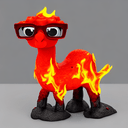

In [8]:
data_uri

In [18]:
data_uri = image_to_base64_data_uri("llava_logo_smallest.png")


llm.create_chat_completion(
    messages = [
        {"role": "system", "content": "You are an assistant who perfectly describes images."},
        {
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": data_uri}},
                {"type" : "text", "text": "Describe this image in detail please."}
            ]
        }
    ]
)

iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAMAAAD04JH5AAADAFBMVEWIiIqIiYuHiImurK2IiIuHh4qIiImHiIqHiIuHh4mJiYqwr7GwsLGJiYuysbKHh4ivrq+tq6yura6rqqupqKinpqeGh4qqqaqvra+Gh4moqKuJh4mysrSqqqysrK6IiYqGhoiwr7D/HAX5DASlo6WFhomHh4uGiIr/DgUQDA4WExUTEBL8GAUnIySkpaiurrD/IQTmAgKLiowZFhgIBAUMCAojHyE4NDXzCAP8DQT/FAOEiI0cGRv7EgX/GAbuBgT9EgagoKEvKywyLS40MDEsKCkpJiePj5FAPT5LAAHeAQHwBgM8NzgfHB4DAQKLioeioqR3AQP/JgT2BwPqBAOMjZDZAQL/CAOChIZrAQN/io9SAQKAgo/4/wVEAQKtBATBAQL+NQR9fH//QQX6BgX9Tw1ZAgP8kAT1DgX4vwQ+AAKWlpj+/wW2AwP+LQVhAQLiAgKiAgSKhYP/NhOWAgT6zwMYAgTTAQKcnJ+FkJT65QKNAgT+Ywj68QOGi5B4dXf6hAeCAwYkAQT7IQX6+gb/JxBIREQyAwT5twX+HQ/47QLNAwP9WQeqr7L49QL7pwPIAQH7nAeNhYn9bQpwcHL71wX63gFhX2FnZ2n3Fgb3rgl7jJb5yAX7ega0ubr8VSWnq63wKiRaWVnuEQemd3YnHR6agYKRkpaqtLiIh4dTTlHIUk1JSE36Qwv8LRYuEhQ8JCRBDhH/QR7ONxKcCwtQEhLz0wdxSEpmHx+cqLPzaRDeGgu5d2j2HQ64pl/xMAiKYWWUkH++P0LAEQ7mDwmjiHPHslHjTkLzbT7uQC3xmArBy879fBjsHhKsY2Xpgi1TIyRvMzXWwT2WnKPfjgv4QTGMl6Da0TR+JSzb18/dZkSnnWuGQ0S2Hh6rqLf7/hf9kBeyqKWil3qQdnxaPT5nDhCDVlitTDT06w/j6+r97wzIZFne

Llama.generate: prefix-match hit

llama_print_timings:        load time =   28272.17 ms
llama_print_timings:      sample time =       9.16 ms /    87 runs   (    0.11 ms per token,  9500.93 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =  245756.48 ms /    87 runs   ( 2824.79 ms per token,     0.35 tokens per second)
llama_print_timings:       total time =  246001.81 ms /    88 tokens


{'id': 'chatcmpl-bf7d21a2-ef0d-44b5-8389-4e8e40f7e6b5',
 'object': 'chat.completion',
 'created': 1711223658,
 'model': 'dapp_llava/ggml-model-q4_k.gguf',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': ' The image features a red and black stuffed toy, resembling a horse or a donkey, with a pair of glasses on its face. The toy appears to be a unique and quirky design, possibly a stuffed animal or a toy for children. The glasses on the toy give it a fun and playful appearance, making it a charming and eye-catching item.'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 605, 'completion_tokens': 86, 'total_tokens': 691}}

In [19]:
response=llm.create_chat_completion(
    messages = [
        {"role": "system", "content": "You are an assistant who perfectly describes images."},
        {
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": data_uri}},
                {"type" : "text", "text": "Describe this image in detail please."}
            ]
        }
    ]
)

encode_image_with_clip: image embedding created: 576 tokens

encode_image_with_clip: image encoded in   594.18 ms by CLIP (    1.03 ms per image patch)


Llama.generate: prefix-match hit

llama_print_timings:        load time =   28272.17 ms
llama_print_timings:      sample time =       9.47 ms /    98 runs   (    0.10 ms per token, 10344.10 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   12120.46 ms /    98 runs   (  123.68 ms per token,     8.09 tokens per second)
llama_print_timings:       total time =   12326.93 ms /    99 tokens


In [20]:
response

{'id': 'chatcmpl-a2fb654b-1490-4a70-9710-404f0065b53c',
 'object': 'chat.completion',
 'created': 1711223969,
 'model': 'dapp_llava/ggml-model-q4_k.gguf',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': ' The image features a toy horse with a unique design, resembling a horse with flames on its body and legs, giving it a fiery appearance. The horse is wearing glasses, adding to its quirky and playful appearance. The glasses have a red frame, which complements the overall color scheme of the toy horse. The toy horse is standing on a table, drawing attention to its eye-catching design and charming features.'},
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 605, 'completion_tokens': 97, 'total_tokens': 702}}

In [21]:
response['choices'][0]['message']['content']

' The image features a toy horse with a unique design, resembling a horse with flames on its body and legs, giving it a fiery appearance. The horse is wearing glasses, adding to its quirky and playful appearance. The glasses have a red frame, which complements the overall color scheme of the toy horse. The toy horse is standing on a table, drawing attention to its eye-catching design and charming features.'